<a href="https://colab.research.google.com/github/Thachhcmute3001/AI/blob/main/Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.models import Sequential

170498071/170498071 [==============================] - 4s 0us/step


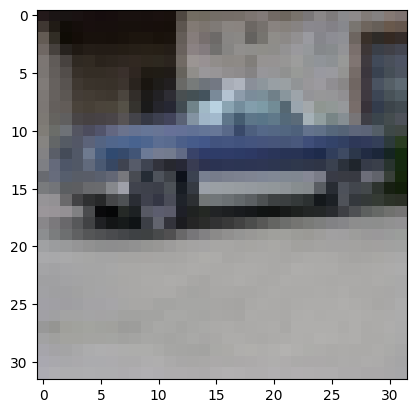

Number: [1]


In [ ]:
(train_images, train_labels),(test_images, test_labels) = cifar10.load_data()
hinh = train_images[10000]
plt.imshow(hinh, cmap = plt.cm.binary)
plt.show()
print('Number:',train_labels[10000])

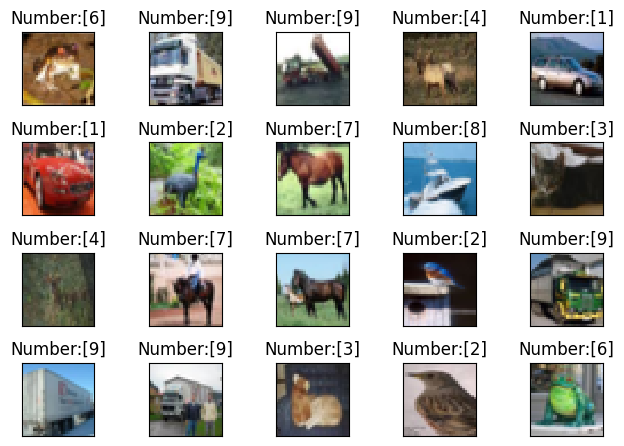

In [ ]:
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i], cmap = 'gray',interpolation = 'none')
  plt.title('Number:{}'.format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])

In [ ]:
model = Sequential() #Just like ANN
model.add(Dense(512, activation = 'relu',input_shape = (32*32*3,))) 
model.add(Dense(10,activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1,578,506
Trainable params: 1,578,506
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_images = train_images.reshape((50000, 32*32*3)) #reshape 60000 images shaped 28x28 pixel
train_images = train_images.astype('float32')/255 #Convert it into 0-1

In [ ]:
test_images = test_images.reshape((10000,32*32*3))
test_image = test_images.astype('float32')/255

In [ ]:
from keras.utils import to_categorical #one hot encoding
train_labels = to_categorical(train_labels, 10) #Converts a class vector (integers) to binary class matrix
test_labels = to_categorical(test_labels, 10) #Converts a class vector (integers) to binary class matrix

In [ ]:
#Compile model
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy',metrics = ['accuracy'])
#Fit model
model.fit(train_images, train_labels, epochs = 10, batch_size = 128)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Accuracy followed by the test folder:', test_acc*100)
print('Loss function', test_loss)

Epoch 1/10
391/391 [==============================] - 13s 31ms/step - loss: 2.2754 - accuracy: 0.2671
Epoch 2/10
391/391 [==============================] - 13s 33ms/step - loss: 1.8026 - accuracy: 0.3550
Epoch 3/10
391/391 [==============================] - 12s 31ms/step - loss: 1.7193 - accuracy: 0.3889
Epoch 4/10
391/391 [==============================] - 13s 34ms/step - loss: 1.6652 - accuracy: 0.4090
Epoch 5/10
391/391 [==============================] - 12s 31ms/step - loss: 1.6237 - accuracy: 0.4263
Epoch 6/10
391/391 [==============================] - 12s 30ms/step - loss: 1.5925 - accuracy: 0.4365
Epoch 7/10
391/391 [==============================] - 12s 31ms/step - loss: 1.5657 - accuracy: 0.4479
Epoch 8/10
391/391 [==============================] - 12s 30ms/step - loss: 1.5436 - accuracy: 0.4541
Epoch 9/10
391/391 [==============================] - 12s 30ms/step - loss: 1.5219 - accuracy: 0.4606
Epoch 10/10
313/313 [==============================] - 3s 8ms/step - loss: 220.970

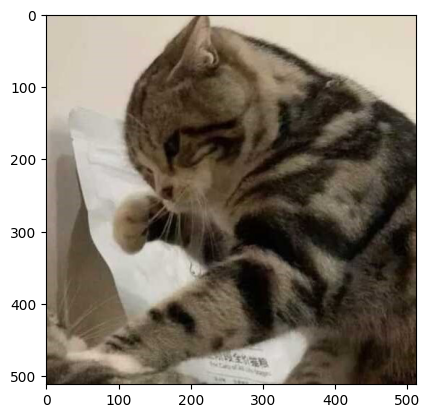

In [ ]:
from keras.utils import load_img
from keras.utils import img_to_array
from pylab import *
import numpy as np
url = 'Cat.jpg'
img = load_img(url)
imshow(img)

In [ ]:
img = load_img(url, target_size = (32,32))
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis = -1)

1/1 [==============================] - 0s 80ms/step


array([3])